<a href="https://colab.research.google.com/github/Vite-Noiz/Machine-Learning-Course/blob/main/LS%20and%20RLS/LS_%26_RLS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**LS**
Least Square regression is a deterministic model, which means that, unlike other stochastic models, the output or the calculated weights does not depend on the algorithm’s state; instead, they solely depend on the input data. And hence no iterations are required.

The objective of Least Squares is to try and find the line that “best fits” the dataset, a kind of line that when imposed onto the set of data points given as inputs will have the lowest possible error.

In the method of Ordinary Least Squares, we try to fit a straight line onto the data points by minimizing the squared difference between the predicted value and the observed value of a given dependent variable.

1. Define a Model

2. Define a Loss Function: In the case of least squares regression, the loss function is the sum of the squared differences between the observed and predicted values. Mathematically, it's often represented as the sum of squared residuals:

 $Loss=∑(yi−y^i)^2$

Where yi are the observed target values, $y^i$​ are the predicted values.

3. Minimize the Loss: This is typically done using optimization algorithms such as gradient descent or analytical solutions (if applicable).

4. Fit the Model

5. Evaluate the Model: Finally, you evaluate the performance of the model using various metrics such as mean squared error (MSE), R-squared, etc., on a separate validation or test dataset to assess its generalization ability.


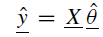

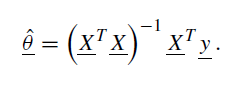

## Weighted Least Square

weighted least squares is a regression technique that addresses heteroscedasticity by assigning weights to observations based on their estimated variances, allowing for more robust parameter estimation and improved model performance.

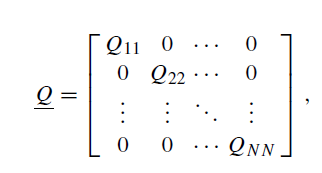

$ Q = 1/var(y) $

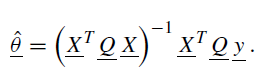


Mean Squared Error: 0.9924386487246483


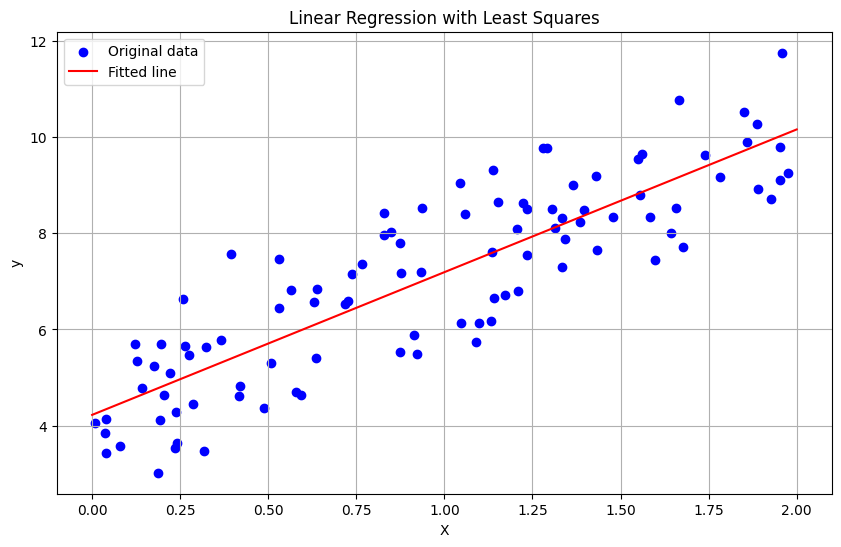

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegressionLS:
    def __init__(self):
        self.coefficients = None

    def fit(self, X, y):
        # Add a column of ones to account for the intercept term
        X = np.column_stack((np.ones(len(X)), X))

        # Compute the coefficients using the least squares method
        self.coefficients = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

    def predict(self, X):
        # Add a column of ones to account for the intercept term
        X = np.column_stack((np.ones(len(X)), X))

        # Predict the target variable
        return X.dot(self.coefficients)

if __name__ == "__main__":
    # Generate some sample data
    np.random.seed(0)
    X = 2 * np.random.rand(100, 1)
    y = 4 + 3 * X + np.random.randn(100, 1)

    # Initialize and fit the linear regression model
    model = LinearRegressionLS()
    model.fit(X, y)

    # Make predictions
    X_new = np.array([[0], [2]])
    y_pred = model.predict(X_new)

    # Calculate Mean Squared Error
    mse = np.mean((y - model.predict(X))**2)
    print("Mean Squared Error:", mse)

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Original data')
    plt.plot(X_new, y_pred, color='red', label='Fitted line')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Linear Regression with Least Squares')
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the Boston Housing dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Split the dataset into features (X) and target variable (y)
X = data
y = target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model using least squares
model = LinearRegressionLS()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 24.29111947497721


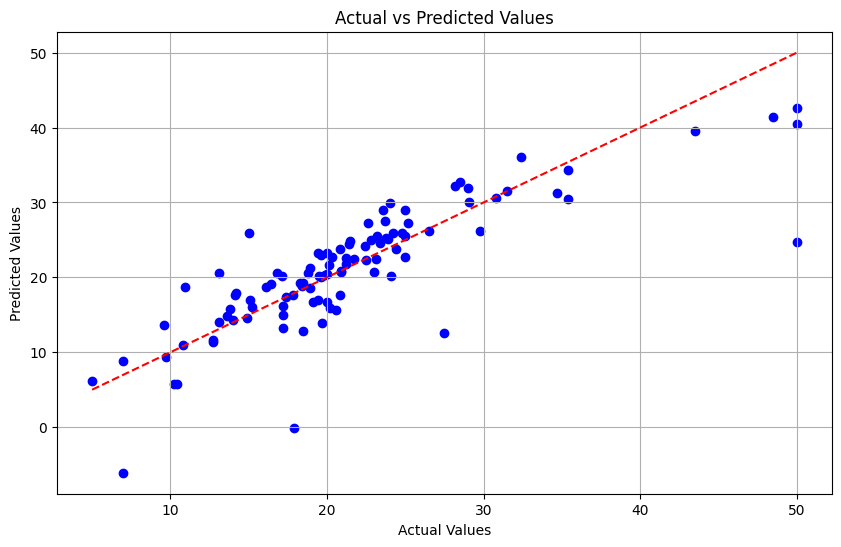

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()


## WLS

In [ ]:
import numpy as np
import statsmodels.api as sm

# Generate sample data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1) * 2  # Adding noise with higher variance

error_variance = 2  # Modify this value based on your estimation

# Calculate weights based on the estimated variance
weights = 1 / error_variance

# Fit the weighted least squares model
X_with_intercept = sm.add_constant(X)  # Add intercept term
model = sm.WLS(y, X_with_intercept, weights=weights)
result = model.fit()

# Print the model summary
print(result.summary())


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.419
Model:                            WLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     70.80
Date:                Tue, 19 Mar 2024   Prob (F-statistic):           3.29e-13
Time:                        11:50:13   Log-Likelihood:                -210.83
No. Observations:                 100   AIC:                             425.7
Df Residuals:                      98   BIC:                             430.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4443      0.387     11.496      0.0

#**RLS**

Recursive Least Squares (RLS) is an adaptive filter algorithm used for online estimation of parameters in a linear model. It's particularly useful when you have streaming data and need to continuously update your model based on new observations. RLS is an extension of the ordinary least squares method, but it updates the model parameters iteratively as new data becomes available.

RLS algorithm:
1. Initialization: Initialize the model parameters and covariance matrix.

2. Predict: Predict the target variable using the current model parameters.

3. Update: When a new observation becomes available, update the model parameters and covariance matrix based on the prediction error and the new observation.

4. Repeat: Repeat steps 2 and 3 for each new observation.


## Forgeting factor
1. The forgetting factor, often denoted by λ (lambda), is a parameter used in RLS algorithms.
2. It controls the influence of past observations on the current estimate of the parameters.
3. The value of the forgetting factor typically ranges between 0 and 1.
4. A higher forgetting factor assigns more weight to recent observations, causing the algorithm to forget past observations more quickly.
5. A lower forgetting factor gives more weight to past observations, leading to slower forgetting of older data.
6. Choosing an appropriate forgetting factor depends on the characteristics of the data and the specific requirements of the application.
7. Adjusting the forgetting factor allows the algorithm to balance the trade-off between incorporating past information and adapting to new data, thereby achieving better performance in various applications.

for more information:
https://www.kaggle.com/code/anshtanwar/rls-recursive-least-squares

Mean Squared Error: 6.644317051848954


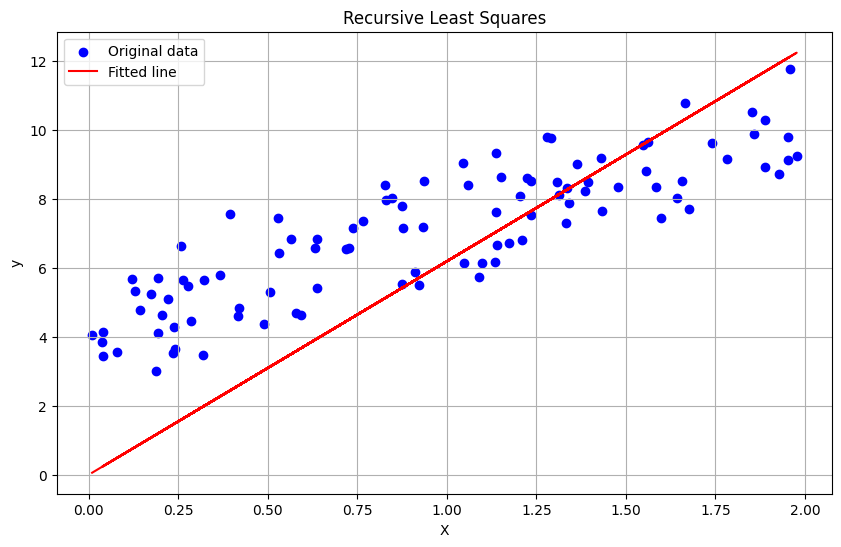

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class RecursiveLeastSquares:
    def __init__(self, n_features, forgetting_factor=0.99):
        self.n_features = n_features
        self.forgetting_factor = forgetting_factor
        self.theta = np.zeros((n_features, 1))  # Initialize model parameters
        self.P = np.eye(n_features)  # Initialize covariance matrix

    def fit(self, X, y):
        errors = []
        for i in range(len(X)):
            x_i = X[i].reshape(-1, 1)
            y_i = y[i]

            # Predict
            y_pred = np.dot(x_i.T, self.theta)

            # Update
            error = y_i - y_pred
            errors.append(error)
            K = np.dot(self.P, x_i) / (self.forgetting_factor + np.dot(np.dot(x_i.T, self.P), x_i))
            self.theta = self.theta + np.dot(K, error)
            self.P = (1 / self.forgetting_factor) * (self.P - np.dot(K, np.dot(x_i.T, self.P)))

        return errors

    def predict(self, X):
        return np.dot(X, self.theta)

if __name__ == "__main__":
    # Generate some sample data
    np.random.seed(0)
    X = 2 * np.random.rand(100, 1)
    y = 4 + 3 * X + np.random.randn(100, 1)

    # Initialize and fit the RLS model
    rls = RecursiveLeastSquares(n_features=1)
    errors = rls.fit(X, y)

    # Make predictions
    y_pred = rls.predict(X)

    # Calculate Mean Squared Error
    mse = np.mean(np.array(errors)**2)
    print("Mean Squared Error:", mse)

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Original data')
    plt.plot(X, y_pred, color='red', label='Fitted line')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Recursive Least Squares')
    plt.legend()
    plt.grid(True)
    plt.show()


Mean Squared Error: 32.59104347359295


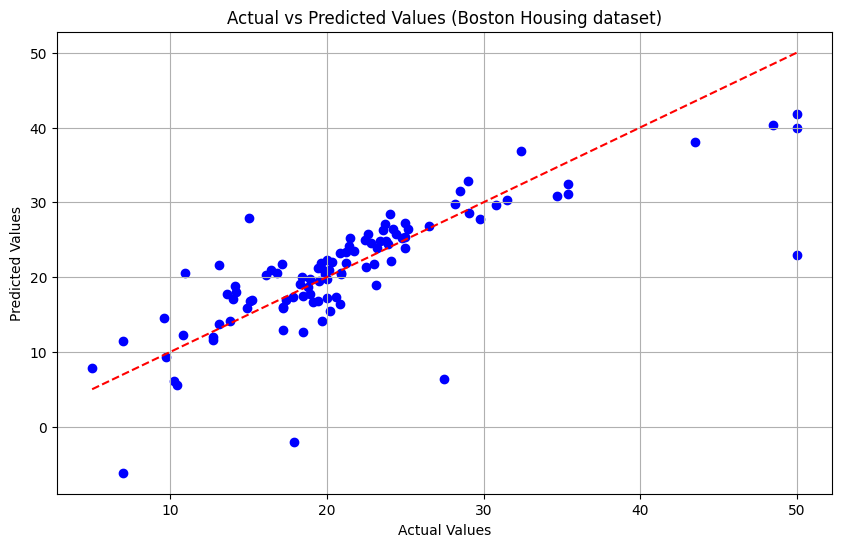

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the Boston Housing dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Split the dataset into features (X) and target variable (y)
X = data
y = target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the RLS model
rls = RecursiveLeastSquares(n_features=X_train.shape[1])
errors = rls.fit(X_train, y_train)

# Make predictions
y_pred = rls.predict(X_test)

# Calculate Mean Squared Error
mse = np.mean(np.array(errors)**2)
print("Mean Squared Error:", mse)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Boston Housing dataset)')
plt.grid(True)
plt.show()